In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze4-v0')
print("This is how maze looks like")
situation = maze.reset()
maze.render()

This is how maze looks like

■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ A □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [4]:
from lcs.agents.xcs import XCS, Configuration


def xcs_maze_knowledge(population, environment) -> float:
    transitions = environment.env.get_all_possible_transitions()
    nr_correct = 0
    for start, action, end in transitions:
        perception = environment.env.maze.perception(*start)
        if any([True for cl in population
                if cl.does_match(perception) and
                cl.action == action and
                cl.wildcard_number == 0
               ]):
            nr_correct += 1
    return nr_correct / len(transitions)

def xcs_maze_metrics(xcs: XCS, environment):
    return {
        'numerosity': xcs.population.numerosity,
        'knowledge': xcs_maze_knowledge(xcs.population, environment),
        'population': len(xcs.population)
    }


cfg = Configuration(number_of_actions=4,
                    max_population=200,
                    metrics_trial_frequency=1,
                    user_metrics_collector_fcn=xcs_maze_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))




INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 3.397154387657675e-39, 'numerosity': 32, 'knowledge': 0.13043478260869565, 'population': 24}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 50, 'reward': 10.54418451232389, 'numerosity': 134, 'knowledge': 0.5043478260869565, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': 31.84844751948691, 'numerosity': 138, 'knowledge': 0.5043478260869565, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 16, 'reward': 140.39584573803828, 'numerosity': 138, 'knowledge': 0.5043478260869565, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 13, 'reward': 386.31875259367615, 'numerosity': 146, 'knowledge': 0.5043478260869565, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 4, 'reward': 110.22730043521983, 'numerosity': 148, 'knowledge': 0.5043478260869565, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 14, 'reward': 276.8124062755869, 'numerosity': 148, 'knowledge': 0.5043478260869565, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 8, 'reward': 201.37235326299884, 'numerosity': 152, 'knowledge': 0.5043478260869565, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': 73.81516779907042, 'numerosity': 152, 'knowledge': 0.5043478260869565, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 9, 'reward': 197.95295672426647, 'numerosity': 160, 'knowledge': 0.5043478260869565, 'population': 104}


Cond:01010101 - Act:0 - Num:1 [fit: 0.000, exp: 99.00, pred: 237.453]
Cond:01010101 - Act:1 - Num:1 [fit: 0.007, exp: 20.00, pred: 191.936]
Cond:01010101 - Act:2 - Num:1 [fit: 0.010, exp: 16.00, pred: 168.171]
Cond:01010101 - Act:3 - Num:1 [fit: 0.016, exp: 19.00, pred: 161.924]
Cond:10001000 - Act:0 - Num:1 [fit: 0.013, exp: 14.00, pred: 200.173]
Cond:10001000 - Act:1 - Num:1 [fit: 0.014, exp: 13.00, pred: 174.660]
Cond:10001000 - Act:2 - Num:1 [fit: 0.000, exp: 49.00, pred: 222.573]
Cond:10001000 - Act:3 - Num:1 [fit: 0.024, exp: 15.00, pred: 135.686]
Cond:00010010 - Act:0 - Num:1 [fit: 0.000, exp: 115.00, pred: 214.798]
Cond:00010010 - Act:1 - Num:1 [fit: 0.002, exp: 32.00, pred: 169.653]
Cond:00010010 - Act:2 - Num:1 [fit: 0.008, exp: 19.00, pred: 183.553]
Cond:00010010 - Act:3 - Num:1 [fit: 0.009, exp: 24.00, pred: 164.046]
Cond:00001000 - Act:0 - Num:1 [fit: 0.001, exp: 35.00, pred: 235.070]
Cond:00001000 - Act:1 - Num:1 [fit: 0.017, exp: 11.00, pred: 105.527]
Cond:00001000 - Act

[20.22, 24.26, 20.76, 23.26, 23.54, 19.82, 24.16, 23.96, 22.92, 22.12, 22.06, 25.18, 20.2, 23.04, 18.6, 22.72, 22.72, 24.32, 23.48, 18.46]


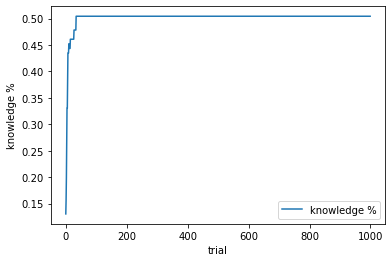

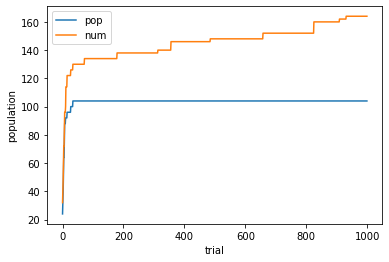

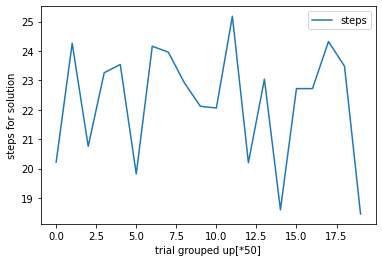

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []



xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])


In [13]:
# It is hard to say but
# looking at amount of times algorithm reaches top steps (50) the steps might actually go down over trials.
# I need to somehow smooth it to see it better
